<a href="https://colab.research.google.com/github/gkianfar/DemCare-Analysis/blob/main/DemCare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essential packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set directory path
dir_path = '/content/drive/MyDrive/DemCare/D11'

# List the files in the directory
files = [f for f in os.listdir(dir_path)]

# Print the subfolders
print(files)

['Motion.csv', 'Plugs.csv', 'MovingIntensity.csv', 'NightSleep.csv', 'SleepMeasurements.csv']


Motion file

In [ ]:
dir_path = '/content/drive/MyDrive/DemCare/D11'
file_name = 'Motion.csv'
file_path = os.path.join(dir_path, file_name)
df_motion = pd.read_csv(file_path,sep=';', quotechar='"')
df_motion

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-21 13:39:46.477,10136,2015-02-21 13:39:31.399,FridgeDoorMoved,2015-02-21,15,0,1,TagSensors
1,2015-02-21 14:17:39.583,10136,2015-02-21 14:17:18.906,FridgeDoorMoved,2015-02-21,20,0,1,TagSensors
2,2015-02-21 14:19:54.291,10136,2015-02-21 14:19:53.215,FridgeDoorMoved,2015-02-21,1,0,1,TagSensors
3,2015-02-21 14:20:24.058,10136,2015-02-21 14:20:07.942,FridgeDoorMoved,2015-02-21,16,0,1,TagSensors
4,2015-02-21 14:22:04.625,10136,2015-02-21 14:21:51.464,FridgeDoorMoved,2015-02-21,13,0,1,TagSensors
...,...,...,...,...,...,...,...,...,...
29924,2015-07-10 19:24:24.239,10136,2015-07-10 19:24:23.239,DoorOpen,2015-07-10,1,0,1,TagSensors
29925,2015-07-10 19:25:09.763,10136,2015-07-10 19:24:36.756,BathroomPresence,2015-07-10,33,0,1,TagSensors
29926,2015-07-10 19:26:18.180,10136,2015-07-10 19:25:30.119,BathroomPresence,2015-07-10,48,0,1,TagSensors
29927,2015-07-10 19:26:04.083,10136,2015-07-10 19:26:03.083,PillBoxMoved,2015-07-10,1,0,1,TagSensors


Number of people and types of devices

In [ ]:
# Number of people
n_people = df_motion['person_id'].nunique()
n_type = df_motion['type'].nunique()
print(f'Number of people: {n_people}')
print(f'Number of types of devices: {n_type}')
#

Number of people: 1
Number of types of devices: 11


In [ ]:
df_motion['type'].unique()

array(['FridgeDoorMoved', 'KitchenPresence', 'TvRemoteMoved',
       'DrugCabinetMoved', 'PillBoxMoved', 'IronMoved',
       'BathroomPresence', 'HerbsMoved', 'VacuumMoved', 'DoorOpen',
       'TvRemoteLivingRoomMoved'], dtype=object)

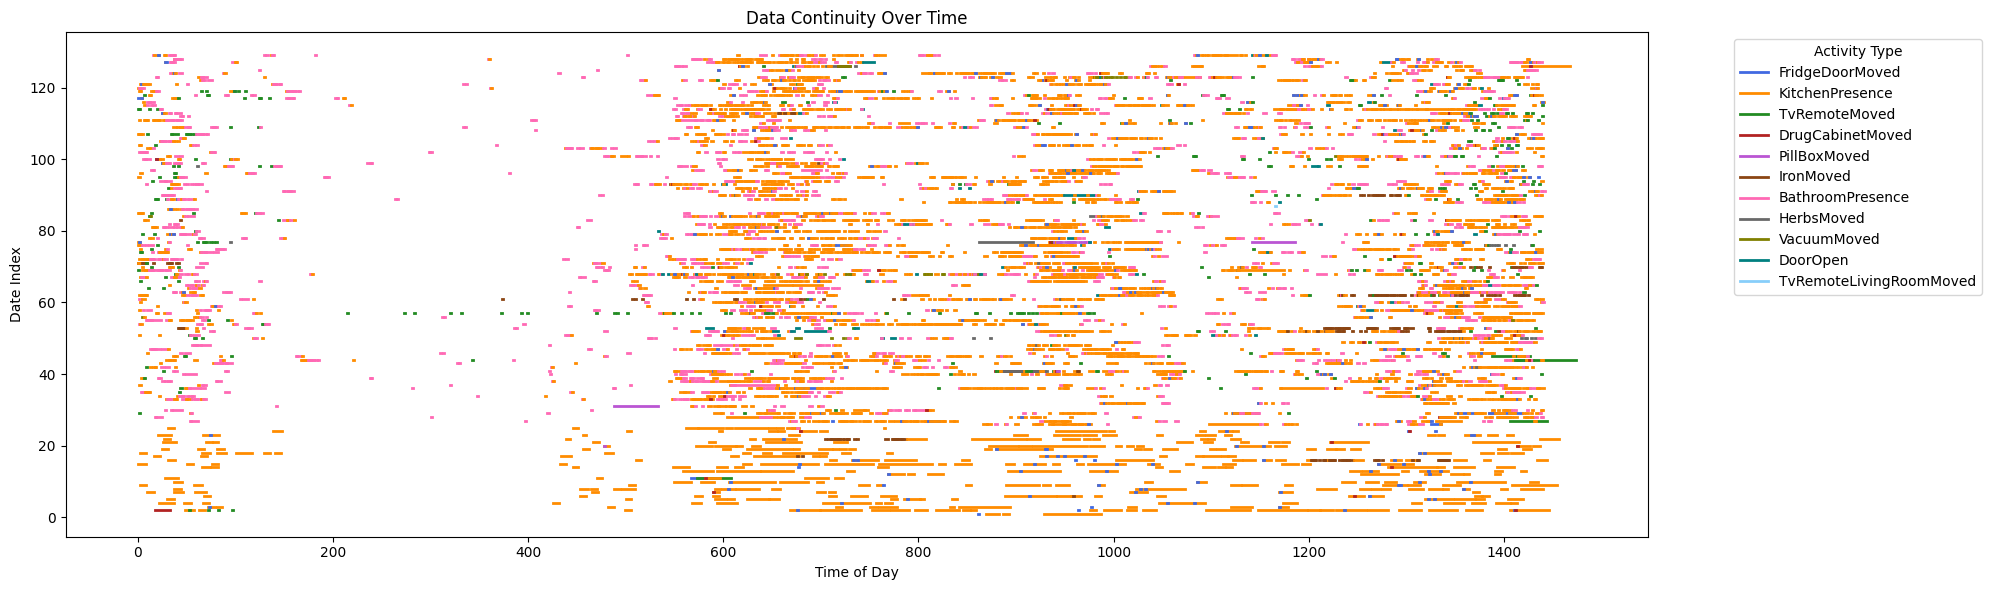

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to datetime
df_motion['start_time'] = pd.to_datetime(df_motion['start_time'])
df_motion['end_time'] = pd.to_datetime(df_motion['end_time'])
df_motion['date'] = pd.to_datetime(df_motion['date']).dt.date
all_dates = sorted(df_motion['date'].unique())

# Initiate figure
plt.figure(figsize=(20, 6))

used_labels = set()  # Moved here!

for d_idx, day in enumerate(all_dates):
    selected_date = pd.to_datetime(day).date()
    df_day = df_motion[df_motion['date'] == selected_date].copy()

    df_day['start_minutes'] = df_day['start_time'].dt.hour * 60 + df_day['start_time'].dt.minute
    df_day['end_minutes'] = df_day['end_time'].dt.hour * 60 + df_day['end_time'].dt.minute
    df_day.loc[df_day['end_minutes'] < df_day['start_minutes'], 'end_minutes'] += 1440

    color = {
        'FridgeDoorMoved': 'royalblue',
        'KitchenPresence': 'darkorange',
        'TvRemoteMoved': 'forestgreen',
        'DrugCabinetMoved': 'firebrick',
        'PillBoxMoved': 'mediumorchid',
        'IronMoved': 'saddlebrown',
        'BathroomPresence': 'hotpink',
        'HerbsMoved': 'dimgray',
        'VacuumMoved': 'olive',
        'DoorOpen': 'teal',
        'TvRemoteLivingRoomMoved': 'lightskyblue'
    }

    for i, row in df_day.iterrows():
        label = row['type'] if row['type'] not in used_labels else None
        used_labels.add(row['type'])

        plt.plot(
            [row['start_minutes'], row['end_minutes']],
            [d_idx + 1, d_idx + 1],
            color=color.get(row['type'], 'black'),
            linewidth=2,
            label=label
        )

plt.xlabel('Time of Day')
plt.ylabel('Date Index')
plt.title('Data Continuity Over Time')

# Show legend only once per type
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Plugs

In [ ]:
dir_path = '/content/drive/MyDrive/DemCare/D11'
file_name = 'Plugs.csv'
file_path = os.path.join(dir_path, file_name)
df_plugs = pd.read_csv(file_path,sep=';',quotechar='"')
df_plugs

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-22 00:22:36.228,10136,2015-02-22 00:19:30.711,BoilerOn,2015-02-22,185,0,1,SmartPlug
1,2015-02-22 00:24:06.377,10136,2015-02-22 00:23:32.685,BoilerOn,2015-02-22,33,0,1,SmartPlug
2,2015-03-04 21:12:52.151,10136,2015-03-04 21:05:06.447,CookerOn,2015-03-04,465,0,1,SmartPlug
3,2015-03-04 21:23:40.550,10136,2015-03-04 21:19:17.268,CookerOn,2015-03-04,263,0,1,SmartPlug
4,2015-03-04 21:25:12.996,10136,2015-03-04 21:23:52.928,CookerOn,2015-03-04,80,0,1,SmartPlug
...,...,...,...,...,...,...,...,...,...
2525,2015-07-10 13:17:57.404,10136,2015-07-10 12:55:19.889,WashingMachineOn,2015-07-10,1357,0,1,SmartPlug
2526,2015-07-10 18:17:27.245,10136,2015-07-10 18:11:56.152,CookerOn,2015-07-10,331,0,1,SmartPlug
2527,2015-07-10 18:49:56.856,10136,2015-07-10 18:47:33.380,WashingMachineOn,2015-07-10,143,0,1,SmartPlug
2528,2015-07-10 19:01:41.305,10136,2015-07-10 18:59:06.677,WashingMachineOn,2015-07-10,154,0,1,SmartPlug


In [ ]:
# Types of appliances
df_plugs['type'].unique()

array(['BoilerOn', 'CookerOn', 'TvOn', 'WashingMachineOn', 'IronOn',
       'VacuumOn'], dtype=object)

Moving Intensity

In [4]:
dir_path = '/content/drive/MyDrive/DemCare/D11'
file_name = 'MovingIntensity.csv'
file_path = os.path.join(dir_path, file_name)
df_movingintensity = pd.read_csv(file_path,sep=';',quotechar='"')
df_movingintensity

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-02-05 13:11:00.000,10136,2015-02-05 13:10:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,34
1,2015-02-05 13:51:00.000,10136,2015-02-05 13:50:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,25
2,2015-02-05 13:52:00.000,10136,2015-02-05 13:51:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,14
3,2015-02-05 13:53:00.000,10136,2015-02-05 13:52:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,73
4,2015-02-05 13:54:00.000,10136,2015-02-05 13:53:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,7
...,...,...,...,...,...,...,...,...,...,...
5976,2015-07-05 16:10:00.000,10136,2015-07-05 16:09:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,106
5977,2015-07-05 16:11:00.000,10136,2015-07-05 16:10:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,107
5978,2015-07-05 16:12:00.000,10136,2015-07-05 16:11:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,79
5979,2015-07-05 16:13:00.000,10136,2015-07-05 16:12:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,38


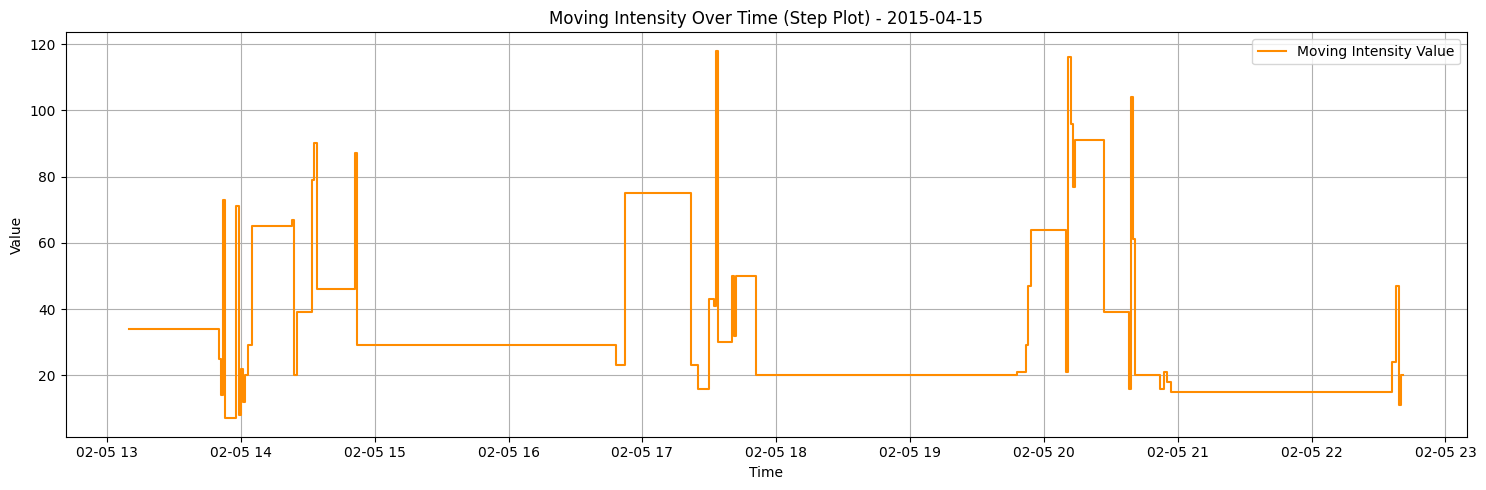

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_movingintensity is already loaded
df_movingintensity['start_time'] = pd.to_datetime(df_movingintensity['start_time'])
df_movingintensity['end_time'] = pd.to_datetime(df_movingintensity['end_time'])

# Sort just in case
df_movingintensity = df_movingintensity.sort_values('start_time')

# Filter for a specific date
df_day = df_movingintensity[df_movingintensity['date'] == '2015-02-05']

# Create a list of times and corresponding values for step plot
times = []
values = []

for _, row in df_day.iterrows():
    times.extend([row['start_time'], row['end_time']])
    values.extend([row['value'], row['value']])

# Plotting
plt.figure(figsize=(15, 5))
plt.step(times, values, where='post', label='Moving Intensity Value', color='darkorange')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Moving Intensity Over Time (Step Plot) - 2015-04-15')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Night Sleep

In [8]:
# Set file name
file_name = 'NightSleep.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_nightsleep = pd.read_csv(file_path,sep=';',quotechar='"')
df_nightsleep

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-18 09:39:00.000,10136,2015-02-18 09:16:00.000,NightSleep,2015-02-18,1380,0,1,Aura
1,2015-03-05 08:06:00.000,10136,2015-03-05 00:33:00.000,NightSleep,2015-03-05,27180,0,1,Aura
2,2015-03-05 09:18:00.000,10136,2015-03-05 08:17:00.000,NightSleep,2015-03-05,3660,0,1,Aura
3,2015-03-06 09:06:00.000,10136,2015-03-06 01:19:00.000,NightSleep,2015-03-06,28020,0,1,Aura
4,2015-03-07 10:16:00.000,10136,2015-03-07 01:50:00.000,NightSleep,2015-03-07,30360,0,1,Aura
...,...,...,...,...,...,...,...,...,...
140,2015-07-06 09:52:00.000,10136,2015-07-06 02:08:00.000,NightSleep,2015-07-06,27840,0,1,Aura
141,2015-07-07 09:01:00.000,10136,2015-07-07 00:00:00.000,NightSleep,2015-07-07,32460,0,1,Aura
142,2015-07-08 09:41:00.000,10136,2015-07-08 00:44:00.000,NightSleep,2015-07-08,32220,0,1,Aura
143,2015-07-09 09:26:00.000,10136,2015-07-09 00:49:00.000,NightSleep,2015-07-09,31020,0,1,Aura


In [9]:
df_nightsleep.sort_values(by='start_time',inplace=True)
df_nightsleep

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-18 09:39:00.000,10136,2015-02-18 09:16:00.000,NightSleep,2015-02-18,1380,0,1,Aura
1,2015-03-05 08:06:00.000,10136,2015-03-05 00:33:00.000,NightSleep,2015-03-05,27180,0,1,Aura
2,2015-03-05 09:18:00.000,10136,2015-03-05 08:17:00.000,NightSleep,2015-03-05,3660,0,1,Aura
3,2015-03-06 09:06:00.000,10136,2015-03-06 01:19:00.000,NightSleep,2015-03-06,28020,0,1,Aura
4,2015-03-07 10:16:00.000,10136,2015-03-07 01:50:00.000,NightSleep,2015-03-07,30360,0,1,Aura
...,...,...,...,...,...,...,...,...,...
140,2015-07-06 09:52:00.000,10136,2015-07-06 02:08:00.000,NightSleep,2015-07-06,27840,0,1,Aura
141,2015-07-07 09:01:00.000,10136,2015-07-07 00:00:00.000,NightSleep,2015-07-07,32460,0,1,Aura
142,2015-07-08 09:41:00.000,10136,2015-07-08 00:44:00.000,NightSleep,2015-07-08,32220,0,1,Aura
143,2015-07-09 09:26:00.000,10136,2015-07-09 00:49:00.000,NightSleep,2015-07-09,31020,0,1,Aura


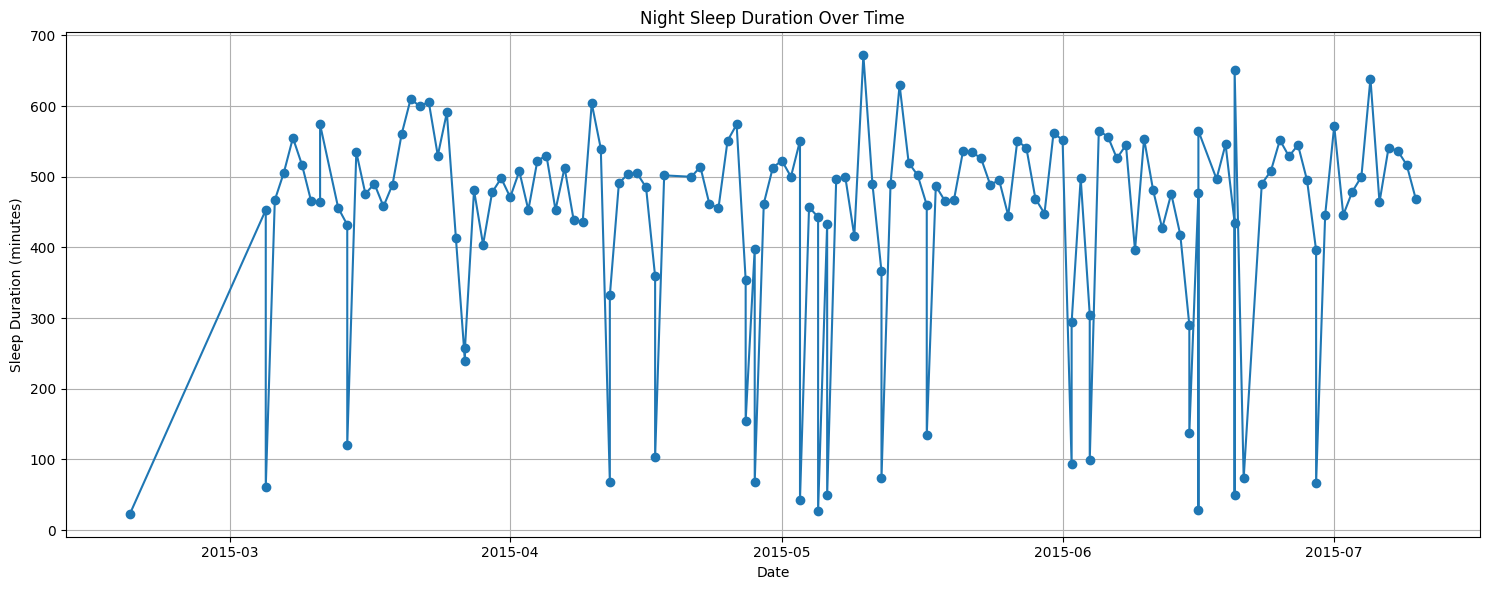

In [ ]:
# Convert to datetime
df_nightsleep['date'] = pd.to_datetime(df_nightsleep['date'])
df_nightsleep['duration_min'] = df_nightsleep['duration'] / 60  # convert seconds to minutes

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df_nightsleep['date'], df_nightsleep['duration_min'], marker='o', linestyle='-')
plt.title('Night Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


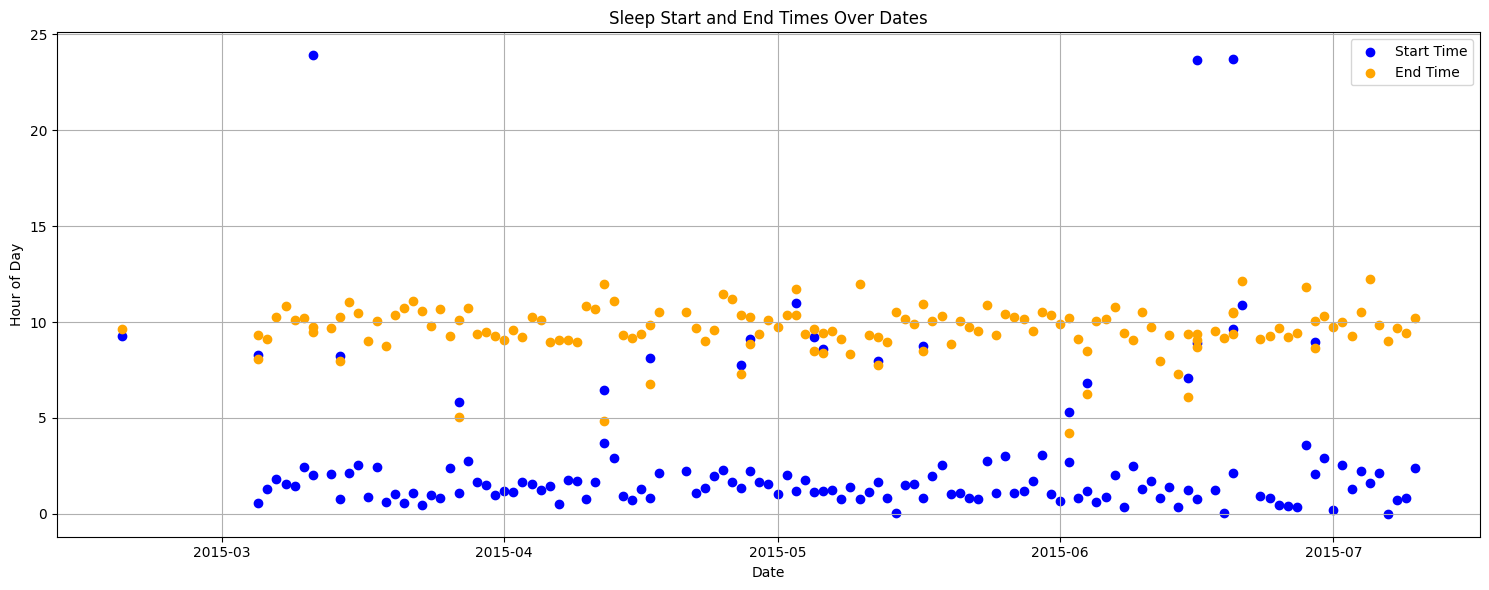

In [ ]:
df_nightsleep['start_time_of_day'] = pd.to_datetime(df_nightsleep['start_time']).dt.time
df_nightsleep['end_time_of_day'] = pd.to_datetime(df_nightsleep['end_time']).dt.time

plt.figure(figsize=(15, 6))
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['start_time']).dt.hour + pd.to_datetime(df_nightsleep['start_time']).dt.minute / 60,
            label='Start Time', color='blue')
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['end_time']).dt.hour + pd.to_datetime(df_nightsleep['end_time']).dt.minute / 60,
            label='End Time', color='orange')

plt.title('Sleep Start and End Times Over Dates')
plt.ylabel('Hour of Day')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sleep Measurement

In [25]:
# Set file name
dir_path = '/content/drive/MyDrive/DemCare/D12'
file_name = 'SleepMeasurements.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_sleepmeasurement = pd.read_csv(file_path,sep=';',quotechar='"')
df_sleepmeasurement

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,NumberOfInterruptions,2015-05-13,19440,0,1,Aura,5
1,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,SleepLatency,2015-05-13,19440,0,1,Aura,960
2,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeAsleep,2015-05-13,19440,0,1,Aura,19440
3,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeDeepSleep,2015-05-13,19440,0,1,Aura,1800
4,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeInBedButAwake,2015-05-13,19440,0,1,Aura,6120
...,...,...,...,...,...,...,...,...,...,...
715,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,SleepLatency,2015-09-30,33240,0,1,Aura,360
716,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeAsleep,2015-09-30,33240,0,1,Aura,33240
717,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeDeepSleep,2015-09-30,33240,0,1,Aura,8220
718,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeInBedButAwake,2015-09-30,33240,0,1,Aura,4500


In [15]:
# Types of measurements
df_sleepmeasurement['type'].unique()

array(['NumberOfInterruptions', 'SleepLatency', 'TotalTimeAsleep',
       'TotalTimeDeepSleep', 'TotalTimeInBedButAwake',
       'TotalTimeShallowSleep'], dtype=object)

In [ ]:
df_sleep_metrics = df_sleepmeasurement.pivot_table(
    index='date',
    columns='type',
    values='value',
    aggfunc='mean'  # or 'sum', 'median', 'max', etc., depending on your goal
)


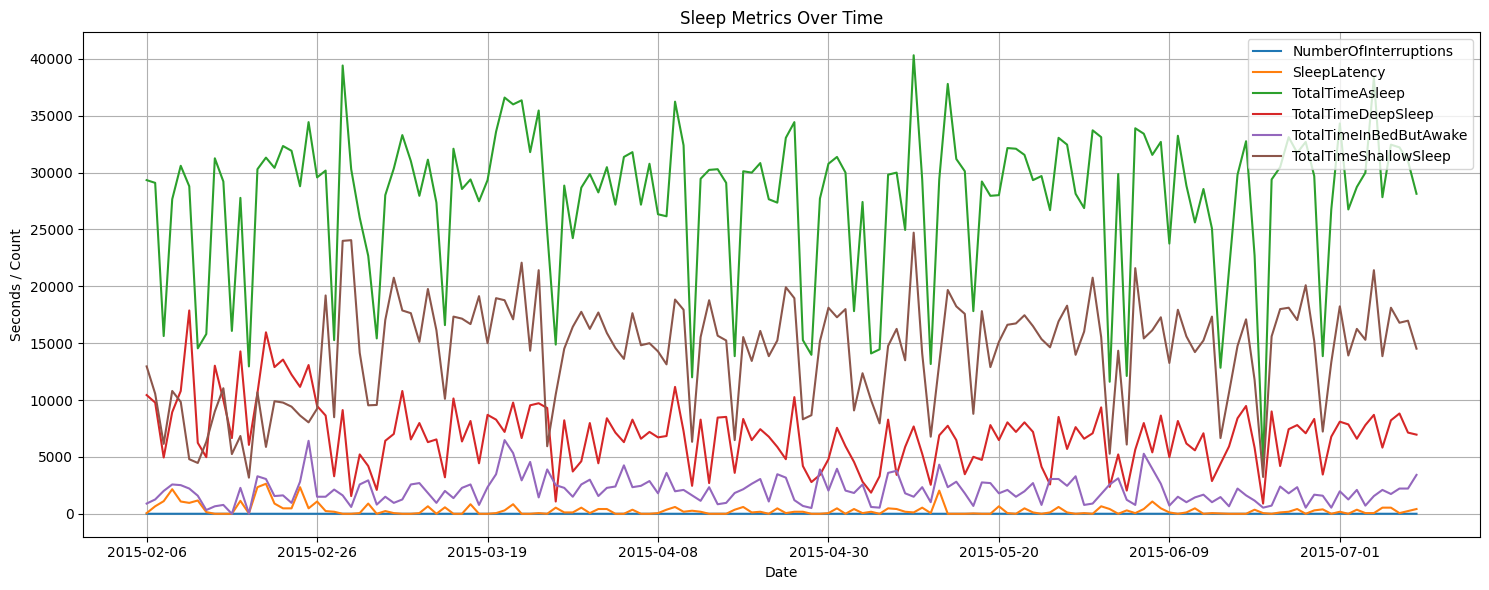

In [ ]:
import matplotlib.pyplot as plt

df_sleep_metrics.plot(figsize=(15, 6))
plt.title("Sleep Metrics Over Time")
plt.ylabel("Seconds / Count")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


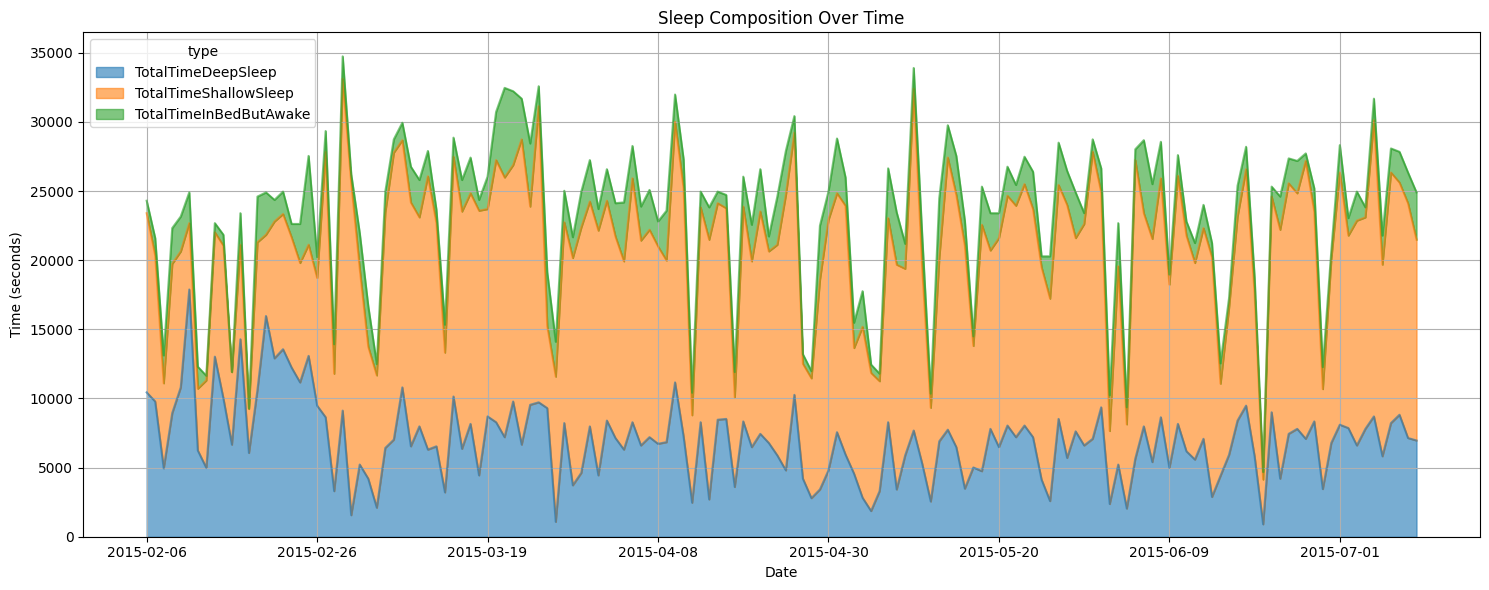

In [ ]:
df_sleep_metrics[['TotalTimeDeepSleep', 'TotalTimeShallowSleep', 'TotalTimeInBedButAwake']].plot.area(
    stacked=True, figsize=(15, 6), alpha=0.6
)
plt.title("Sleep Composition Over Time")
plt.ylabel("Time (seconds)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


Sleep Phases

In [24]:
dir_path = '/content/drive/MyDrive/DemCare/D12'
file_name = 'SleepPhases.csv'
file_path = os.path.join(dir_path,file_name)
df_sleepphases = pd.read_csv(file_path,sep=';',quotechar='"')
df_sleepphases

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-05-13 22:14:00.000,10137,2015-05-13 21:58:00.000,Awake,2015-05-13,960,0,1,Aura
1,2015-05-13 22:43:00.000,10137,2015-05-13 22:14:00.000,LightSleep,2015-05-13,1740,0,1,Aura
2,2015-05-13 22:58:00.000,10137,2015-05-13 22:43:00.000,RemSleep,2015-05-13,900,0,1,Aura
3,2015-05-13 23:00:00.000,10137,2015-05-13 22:58:00.000,LightSleep,2015-05-13,120,0,1,Aura
4,2015-05-13 23:02:00.000,10137,2015-05-13 23:00:00.000,DeepSleep,2015-05-13,120,0,1,Aura
...,...,...,...,...,...,...,...,...,...
4499,2015-09-30 07:38:00.000,10137,2015-09-30 07:29:00.000,LightSleep,2015-09-30,540,0,1,Aura
4500,2015-09-30 07:48:00.000,10137,2015-09-30 07:38:00.000,RemSleep,2015-09-30,600,0,1,Aura
4501,2015-09-30 07:53:00.000,10137,2015-09-29 22:01:00.000,NightSleep,2015-09-29,35520,0,1,Aura
4502,2015-09-30 07:54:00.000,10137,2015-09-30 07:48:00.000,Awake,2015-09-30,360,0,1,Aura


In [23]:
df_sleepphases['type'].unique()

array(['Awake', 'LightSleep', 'RemSleep', 'DeepSleep'], dtype=object)

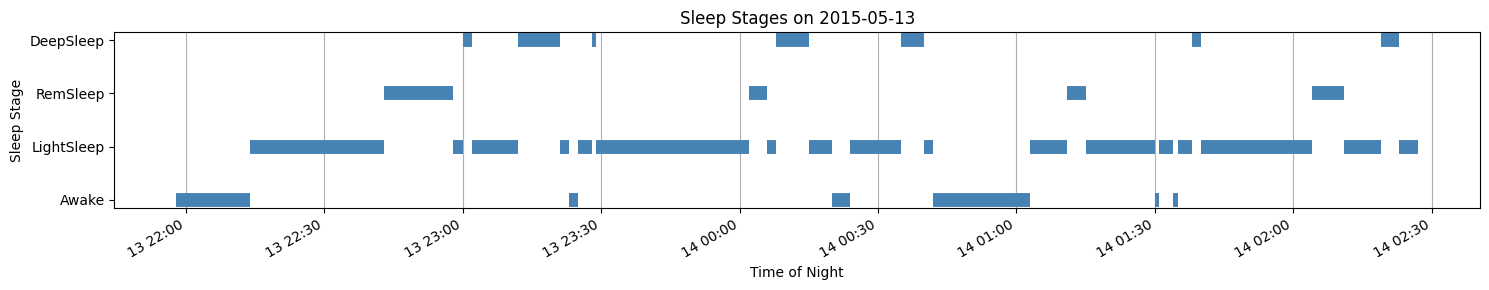

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the night you're interested in
selected_date = '2015-05-13'

df_select = df_sleepphases[
    (df_sleepphases['date'] == selected_date) &
    (df_sleepphases['type'] == 'NightSleep')
]

# Determine sleep time hours with corresponding dates
start = df_select.start_time.item()
end = df_select.end_time.item()
bool_condition = (
    (df_sleepphases['start_time'] <= end) &
    (df_sleepphases['start_time'] >= start) &
    (df_sleepphases['end_time'] <= end) &
    (df_sleepphases['end_time'] >= start)
)

df_day = df_sleepphases[bool_condition].copy()


# Convert times to datetime
df_day['start_time'] = pd.to_datetime(df_day['start_time'])
df_day['end_time'] = pd.to_datetime(df_day['end_time'])

# Define order and levels for sleep stages
sleep_stage_order = ['Awake', 'LightSleep', 'RemSleep', 'DeepSleep']
df_day['type'] = pd.Categorical(df_day['type'], categories=sleep_stage_order, ordered=True)

# Map stages to y positions
stage_to_y = {stage: i for i, stage in enumerate(sleep_stage_order)}
df_day['y'] = df_day['type'].map(stage_to_y)

# Plot
plt.figure(figsize=(15, 3))

for _, row in df_day.iterrows():
    plt.hlines(
        y=row['y'],
        xmin=row['start_time'],
        xmax=row['end_time'],
        color='steelblue',
        linewidth=10
    )

# Format plot
plt.yticks(list(stage_to_y.values()), list(stage_to_y.keys()))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time of Night')
plt.ylabel('Sleep Stage')
plt.title(f"Sleep Stages on {selected_date}")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [44]:
df_sleepphases[bool_condition].copy()

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-05-13 22:14:00.000,10137,2015-05-13 21:58:00.000,Awake,2015-05-13,960,0,1,Aura
1,2015-05-13 22:43:00.000,10137,2015-05-13 22:14:00.000,LightSleep,2015-05-13,1740,0,1,Aura
2,2015-05-13 22:58:00.000,10137,2015-05-13 22:43:00.000,RemSleep,2015-05-13,900,0,1,Aura
3,2015-05-13 23:00:00.000,10137,2015-05-13 22:58:00.000,LightSleep,2015-05-13,120,0,1,Aura
4,2015-05-13 23:02:00.000,10137,2015-05-13 23:00:00.000,DeepSleep,2015-05-13,120,0,1,Aura
5,2015-05-13 23:12:00.000,10137,2015-05-13 23:02:00.000,LightSleep,2015-05-13,600,0,1,Aura
6,2015-05-13 23:21:00.000,10137,2015-05-13 23:12:00.000,DeepSleep,2015-05-13,540,0,1,Aura
7,2015-05-13 23:23:00.000,10137,2015-05-13 23:21:00.000,LightSleep,2015-05-13,120,0,1,Aura
8,2015-05-13 23:25:00.000,10137,2015-05-13 23:23:00.000,Awake,2015-05-13,120,0,1,Aura
9,2015-05-13 23:28:00.000,10137,2015-05-13 23:25:00.000,LightSleep,2015-05-13,180,0,1,Aura
